In [2]:
#TODO: extend to multiple variables 

# Imports
import cartopy
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import iris
from iris.analysis import Aggregator
import iris.plot as iplt
import iris.quickplot as qplt
import iris.coord_categorisation
from iris.util import rolling_window
from ruamel import yaml
from tqdm import tqdm
from ruamel.yaml import ruamel
import warnings

import os

In [3]:
# analysis of quantile cubes:

# load data:

filepaths_early = ['/p/tmp/quante/snow_simulation_data/notebook_output/ISIMIP3b-MPI-ESM-1-2-HR_historical_1851-1880_multiplied_with_population_quantile_analysis.nc',
                    '/p/tmp/quante/snow_simulation_data/notebook_output/ISIMIP3b-MPI-ESM-1-2-HR_ssp126_2021-2050_multiplied_with_population_quantile_analysis.nc'
                    ,'/p/tmp/quante/snow_simulation_data/notebook_output/ISIMIP3b-MPI-ESM-1-2-HR_ssp585_2021-2050_multiplied_with_population_quantile_analysis.nc']


filepaths_later = ['/p/tmp/quante/snow_simulation_data/notebook_output/ISIMIP3b-MPI-ESM-1-2-HR_historical_1881-1910_multiplied_with_population_quantile_analysis.nc'
,'/p/tmp/quante/snow_simulation_data/notebook_output/ISIMIP3b-MPI-ESM-1-2-HR_ssp126_2071-2100_multiplied_with_population_quantile_analysis.nc'
,'/p/tmp/quante/snow_simulation_data/notebook_output/ISIMIP3b-MPI-ESM-1-2-HR_ssp585_2071-2100_multiplied_with_population_quantile_analysis.nc']


# inspect data

early_data = iris.load(filepaths_early)
later_data = iris.load(filepaths_later)

#function to plot quantile data





In [4]:
# test

testdata = early_data[0]

In [5]:
# define colormap greyfilling 0 values

colors_no_extreme = plt.cm.plasma(np.linspace(0, 0.05, 1))
colors_extreme = plt.cm.plasma(np.linspace(0.2, 1, 512))
all_colors = np.vstack((colors_no_extreme, colors_extreme))
# make color value for 0 grey
all_colors[0] = (0.5, 0.5, 0.5, 1.0)

extremes_cmap = clr.LinearSegmentedColormap.from_list('extremes_map',
                                                                       all_colors)    
bounds_zero = [0, 1]
bounds_extremes = list(np.arange(100, 2000, 5))
bounds = bounds_zero + bounds_extremes    

In [25]:
# plot quantile data method

def plot_quantile_data (startyear,finalyear,scenario,quantile,data,colormap=extremes_cmap,label=""):
    vmin=10
    vmax = 1000
    percentile_constraint = iris.Constraint(percentile_over_time = quantile)
    data_identifier = scenario
    data_restricted = data.extract(percentile_constraint)
    pcm = iris.plot.pcolormesh(data_restricted, cmap=colormap, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(pcm, extend='both', orientation='horizontal',label=label)
    plt.title(data_identifier +" - "+str(quantile)+'th Quantile' + ', '+ str(startyear) + " to " + str(finalyear), fontsize=10)

    plt.gca().coastlines('110m') 

 

/home/quante/.conda/envs/my_root/lib/python3.6/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/quante/.conda/envs/my_root/lib/python3.6/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


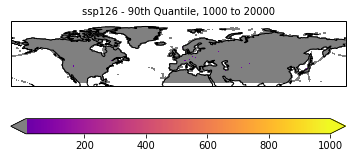

In [26]:
plot_quantile_data (1000,20000,'ssp126',90,testdata)
plt.show()

In [39]:
def plot_quantile_differences (startyear,finalyear,basic_data,scenario_basic,data_to_subtract,scenario_subtract,quantile,colormap='RdBu',historical=False,historical_start=1851,historical_end=1880):
    
    vmin = -100
    vmax=100
    percentile_constraint = iris.Constraint(percentile_over_time = quantile) 
    difference_data = basic_data.extract(percentile_constraint)-data_to_subtract.extract(percentile_constraint)
    pcm = iris.plot.pcolormesh(difference_data, cmap=colormap, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(pcm, extend='both', orientation='horizontal')
    title = str(quantile)+'th Quantile: '+scenario_basic+ ' - '+scenario_subtract+', '+str(startyear)+' to '+str(finalyear)
    
    #plt.gca().coastlines('110m') 
    if historical:
        title = title + str(" / hist."+str(historical_start)+" to "+str(historical_end))
    plt.title(title, fontsize=8)
 
   


In [172]:
warnings.simplefilter('ignore')

In [22]:


historical_early = early_data[0]
ssp126_early = early_data[1]
ssp585_early = early_data[2]

In [23]:
historical_later = later_data[0]
ssp126_later = later_data[1]
ssp585_later = later_data[2]


/home/quante/.conda/envs/my_root/lib/python3.6/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/quante/.conda/envs/my_root/lib/python3.6/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


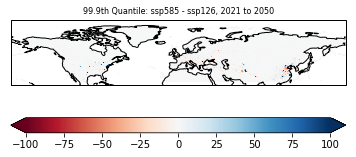

In [28]:
plot_quantile_differences(2021,2050,ssp585_early,'ssp585',ssp126_early,'ssp126',99.9,historical=False)
plt.show()
plt.close()

In [31]:
def quantile_comparison(quantile,population=False):
    fig = plt.figure(figsize=(12, 4))
    suptitle = str('Comparison of '+str(quantile) +'th quantile')
    fig.suptitle(suptitle)
    ax1 = plt.subplot(231)
    plot_quantile_data (1851,1880,'historical',quantile,historical_early)
    ax2 = plt.subplot(234)
    plot_quantile_data (1881,1910,'historical',quantile,historical_later)
    ax3 = plt.subplot(232)
    plot_quantile_data (2021,2050,'ssp126',quantile,ssp126_early)
    ax4 = plt.subplot(235)
    plot_quantile_data (2071,2100,'ssp126',quantile,ssp126_later)
    ax5 = plt.subplot(233)
    plot_quantile_data (2021,2050,'ssp585',quantile,ssp585_early)
    ax6 = plt.subplot(236)
    plot_quantile_data (2071,2100,'ssp585',quantile,ssp585_later)
    # add a big axis, hide frame
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    label = 'daily snowfall (mm)'
    if (population):
        label += ' times 2020 persons per cell'
    plt.title(label)   


    plt.show()
    filename='quantile_comparison_'+str(quantile)
    
    if population:
        filename += '_multiplied_with_population'
    fig.savefig(filename+'.png')
    plt.close()

In [32]:
outputdir = '/p/tmp/quante/snow_simulation_data/notebook_output'
os.chdir(outputdir)

/home/quante/.conda/envs/my_root/lib/python3.6/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/quante/.conda/envs/my_root/lib/python3.6/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


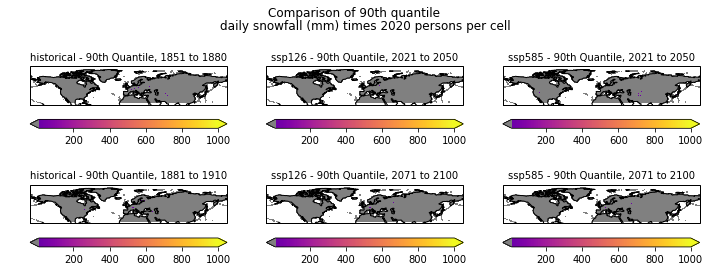

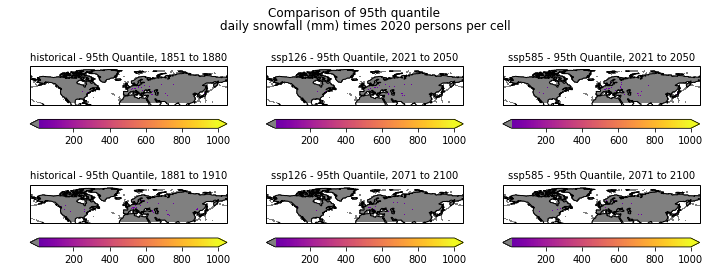

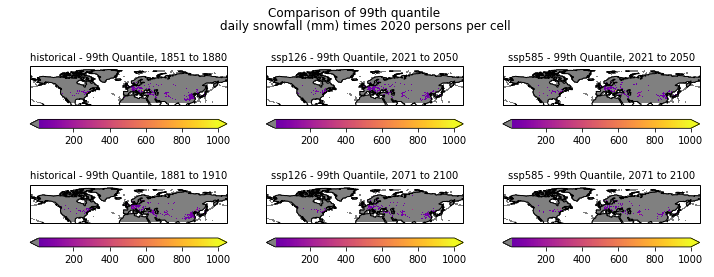

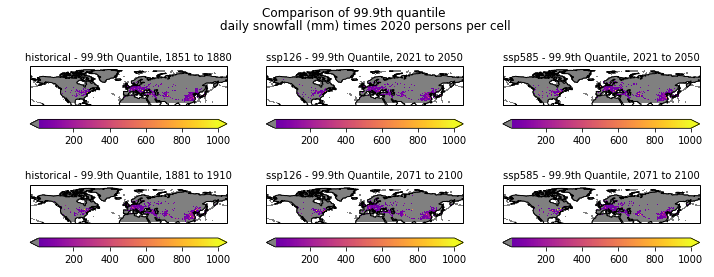

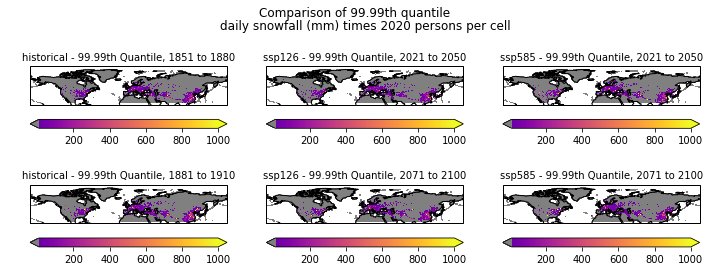

In [33]:
# create figure with quantile data:

quantiles = [90,95,99,99.9,99.99]
plt.close()
for i_quantile in quantiles: 
    quantile_comparison(i_quantile,population=True)


In [41]:
def quantile_differences(quantile,population=False):
    fig = plt.figure(figsize=(15, 5))
    suptitle = str('Comparison of differences of '+str(quantile) +'th quantile')
    fig.suptitle(suptitle)
    ax1 = plt.subplot(231)
    plot_quantile_differences(2021,2050,ssp585_early,'ssp585',ssp126_early,'ssp126',quantile)
    ax2 = plt.subplot(234)
    plot_quantile_differences(2071,2100,ssp585_later,'ssp585',ssp126_later,'ssp126',quantile)
    ax3 = plt.subplot(232)
    plot_quantile_differences(2021,2050,ssp585_early,'ssp585',historical_early,'historical',quantile,historical=True)
    ax4 = plt.subplot(235)
    plot_quantile_differences(1881,1910,historical_later,'hist_later',historical_early,'hist',quantile,historical=True)
    ax5 = plt.subplot(233)
    plot_quantile_differences(2071,2100,ssp585_later,'ssp585',historical_early,'historical',quantile,historical=True,historical_start=1851,historical_end=1880)
    ax6 = plt.subplot(236)
    plot_quantile_differences(2071,2100,ssp126_later,'ssp126',historical_early,'historical',quantile,historical=True,historical_start=1851,historical_end=1880)
   
    # add a big axis, hide frame
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    label = 'daily snowfall (mm)'
    if (population):
        label += ' times 2020 persons per cell'
    plt.title(label)   


    plt.show()
    filename='quantile_differences'+str(quantile)
    if population:
        filename += '_multiplied_with_population'
    fig.savefig(filename+'.png')
    plt.close()

/home/quante/.conda/envs/my_root/lib/python3.6/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/quante/.conda/envs/my_root/lib/python3.6/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


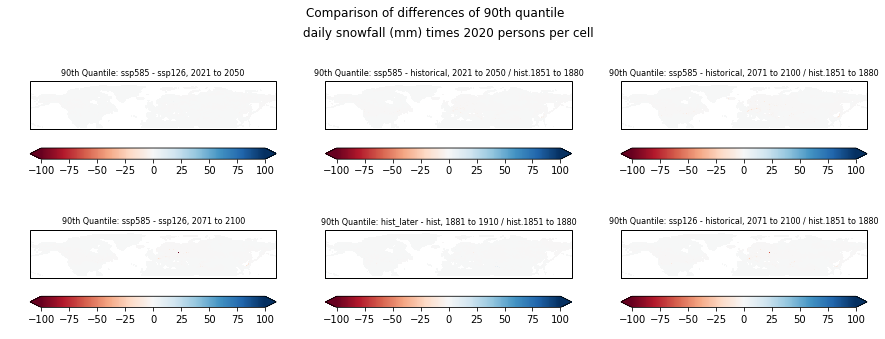

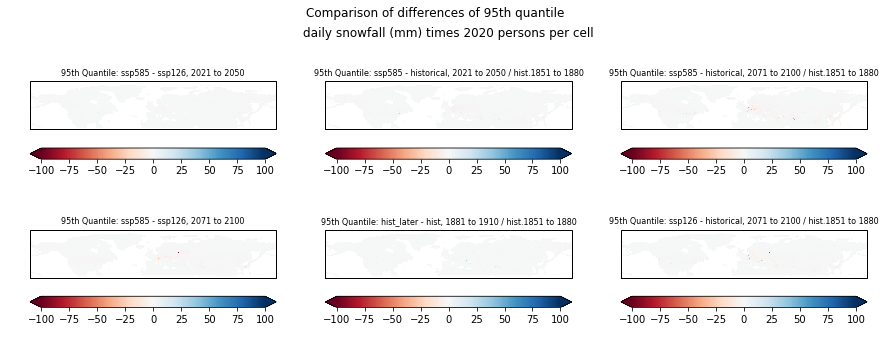

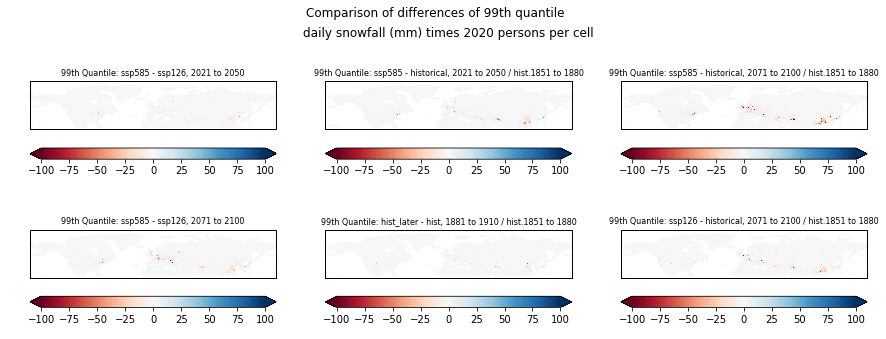

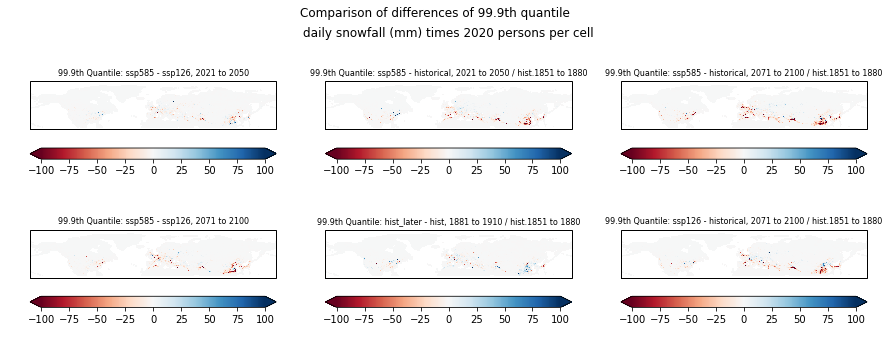

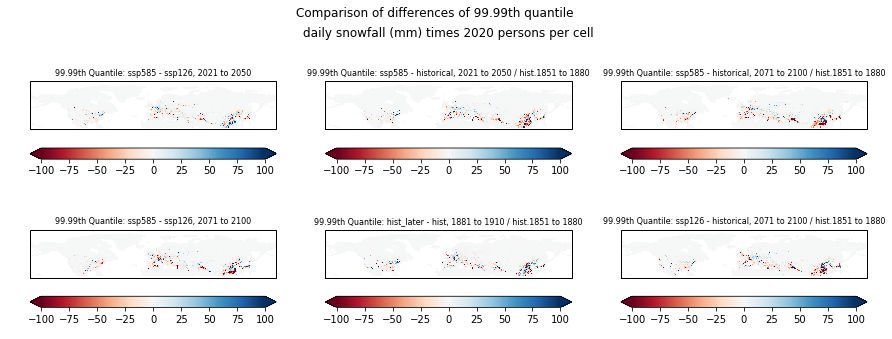

In [42]:

quantiles = [90,95,99,99.9,99.99]
plt.close()
for i_quantile in quantiles: 
    quantile_differences(i_quantile,population=True)
